# Candlestick Homing Pigeon

https://www.investopedia.com/terms/b/bullishhomingpigeon.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2018-01-01'
end = '2021-10-08'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,10.42,11.02,10.34,10.98,10.98,44146300
2018-01-03,11.61,12.14,11.36,11.55,11.55,154066700
2018-01-04,12.10,12.43,11.97,12.12,12.12,109503000
2018-01-05,12.19,12.22,11.66,11.88,11.88,63808900
2018-01-08,12.01,12.30,11.85,12.28,12.28,63346000


## Candlestick with Homing Pigeon

In [3]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,736696.0,10.42,11.02,10.34,10.98,10.98,44146300,True
1,736697.0,11.61,12.14,11.36,11.55,11.55,154066700,False
2,736698.0,12.10,12.43,11.97,12.12,12.12,109503000,True
3,736699.0,12.19,12.22,11.66,11.88,11.88,63808900,False
4,736702.0,12.01,12.30,11.85,12.28,12.28,63346000,True


Text(0, 0.5, 'Price')

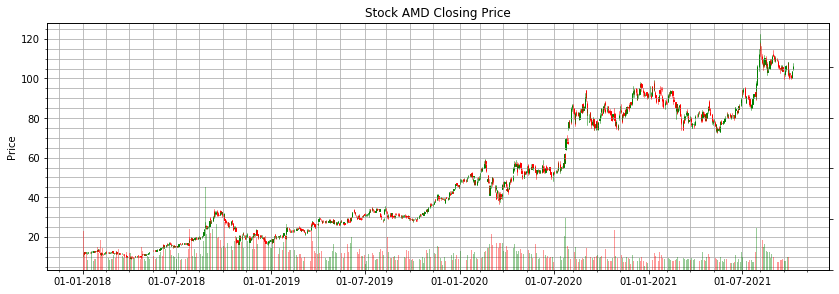

In [4]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

In [5]:
homing_pigeon = talib.CDLHOMINGPIGEON(df['Open'], df['High'], df['Low'], df['Close'])

homing_pigeon = homing_pigeon[homing_pigeon != 0]

In [6]:
df['homing_pigeon'] = talib.CDLHOMINGPIGEON(df['Open'], df['High'], df['Low'], df['Close'])

In [7]:
df.loc[df['homing_pigeon'] !=0]

,Open,High,Low,Close,Adj Close,Volume,homing_pigeon
Date,,,,,,,
2018-02-09,11.540000,11.570000,10.630000,11.310000,11.310000,85458200,100
2018-04-03,9.630000,9.770000,9.300000,9.550000,9.550000,54891600,100
2019-01-23,20.030001,20.480000,19.549999,19.799999,19.799999,77811300,100
2019-02-13,22.980000,23.240000,22.709999,22.850000,22.850000,57544200,100
2019-05-24,26.610001,26.930000,26.400000,26.440001,26.440001,39835800,100
2019-08-26,30.340000,30.719999,29.940001,30.280001,30.280001,50612500,100
2020-06-17,54.790001,55.820000,54.299999,54.549999,54.549999,45146500,100
2020-10-22,79.650002,80.820000,78.419998,79.419998,79.419998,38006800,100
2021-01-19,89.559998,89.580002,87.239998,89.449997,89.449997,45115100,100


In [8]:
df['Adj Close'].loc[df['homing_pigeon'] !=0]

Date
2018-02-09    11.310000
2018-04-03     9.550000
2019-01-23    19.799999
2019-02-13    22.850000
2019-05-24    26.440001
2019-08-26    30.280001
2020-06-17    54.549999
2020-10-22    79.419998
2021-01-19    89.449997
2021-03-05    78.519997
Name: Adj Close, dtype: float64

In [9]:
df['Adj Close'].loc[df['homing_pigeon'] !=0].index

DatetimeIndex(['2018-02-09', '2018-04-03', '2019-01-23', '2019-02-13',
               '2019-05-24', '2019-08-26', '2020-06-17', '2020-10-22',
               '2021-01-19', '2021-03-05'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [10]:
homing_pigeon

Date
2018-02-09    100
2018-04-03    100
2019-01-23    100
2019-02-13    100
2019-05-24    100
2019-08-26    100
2020-06-17    100
2020-10-22    100
2021-01-19    100
2021-03-05    100
dtype: int32

In [11]:
homing_pigeon.index

DatetimeIndex(['2018-02-09', '2018-04-03', '2019-01-23', '2019-02-13',
               '2019-05-24', '2019-08-26', '2020-06-17', '2020-10-22',
               '2021-01-19', '2021-03-05'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,homing_pigeon
Date,,,,,,,
2018-01-02,10.420000,11.020000,10.340000,10.980000,10.980000,44146300,0
2018-01-03,11.610000,12.140000,11.360000,11.550000,11.550000,154066700,0
2018-01-04,12.100000,12.430000,11.970000,12.120000,12.120000,109503000,0
2018-01-05,12.190000,12.220000,11.660000,11.880000,11.880000,63808900,0
2018-01-08,12.010000,12.300000,11.850000,12.280000,12.280000,63346000,0
...,...,...,...,...,...,...,...
2021-10-01,102.599998,103.000000,100.639999,102.449997,102.449997,41491600,0
2021-10-04,101.739998,101.849998,99.820000,100.339996,100.339996,41967100,0
2021-10-05,100.919998,102.870003,100.610001,101.809998,101.809998,31455200,0


Text(0, 0.5, 'Price')

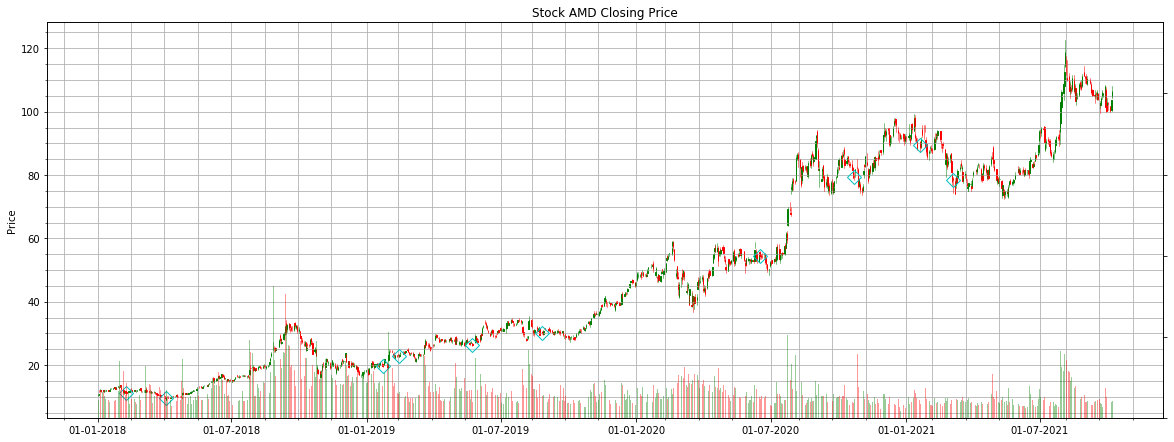

In [13]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['homing_pigeon'] !=0].index, df['Adj Close'].loc[df['homing_pigeon'] !=0],
                'Dc', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=10.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

## Plot Certain dates

In [14]:
df = df['2021-01-01':'2021-02-01']
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,homing_pigeon,VolumePositive
0,737794.0,92.110001,96.059998,90.919998,92.300003,92.300003,51802600,0,True
1,737795.0,92.099998,93.209999,91.410004,92.769997,92.769997,34208000,0,True
2,737796.0,91.620003,92.279999,89.459999,90.330002,90.330002,51911700,0,False
3,737797.0,91.330002,95.510002,91.199997,95.160004,95.160004,42897200,0,True
4,737798.0,95.980003,96.400002,93.269997,94.580002,94.580002,39816400,0,False


Text(0, 0.5, 'Price')

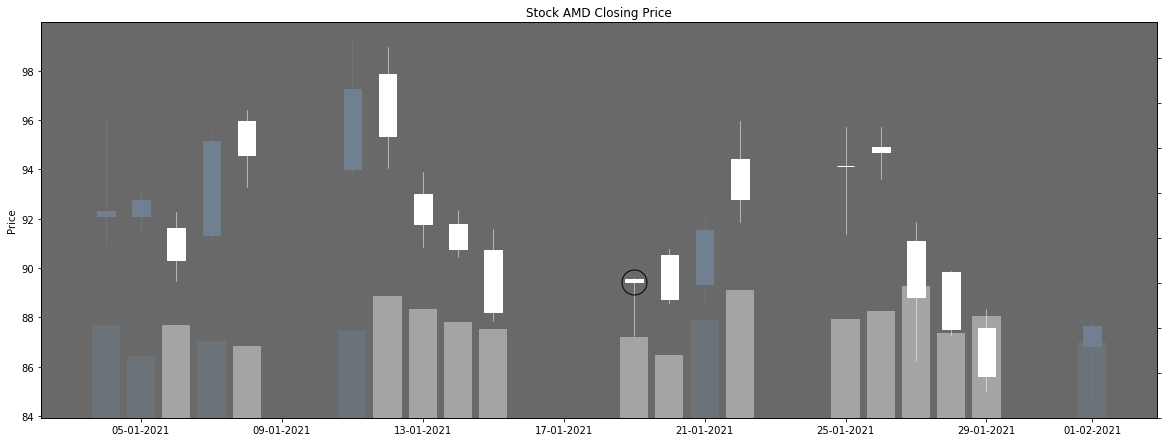

In [15]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
ax.set_facecolor('dimgray')
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='slategrey', colordown='white', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['homing_pigeon'] !=0].index, df['Adj Close'].loc[df['homing_pigeon'] !=0],
                'ok', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=25.0) 
colors = dfc.VolumePositive.map({True: 'slategrey', False: 'white'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

# Highlight Candlestick

Text(0, 0.5, 'Price')

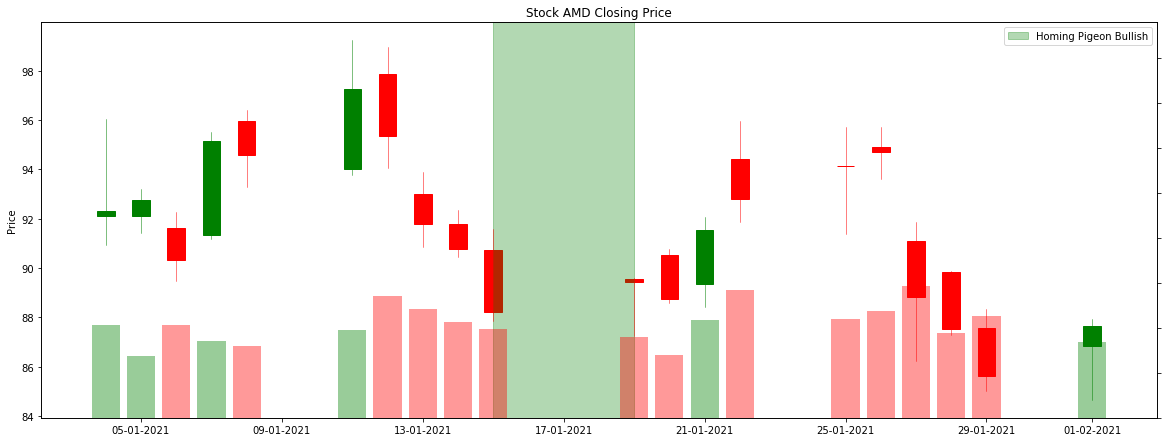

In [16]:
from matplotlib.dates import date2num
from datetime import datetime

fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.axvspan(date2num(datetime(2021,1,15)), date2num(datetime(2021,1,19)), 
           label="Homing Pigeon Bullish",color="green", alpha=0.3)
ax.legend()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')